In [57]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Mobile Phone Price Prediction

In [89]:
df = pd.read_csv("data/mobile_price_prediction_data.csv")

In [90]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


## Exploratory Data Analysis

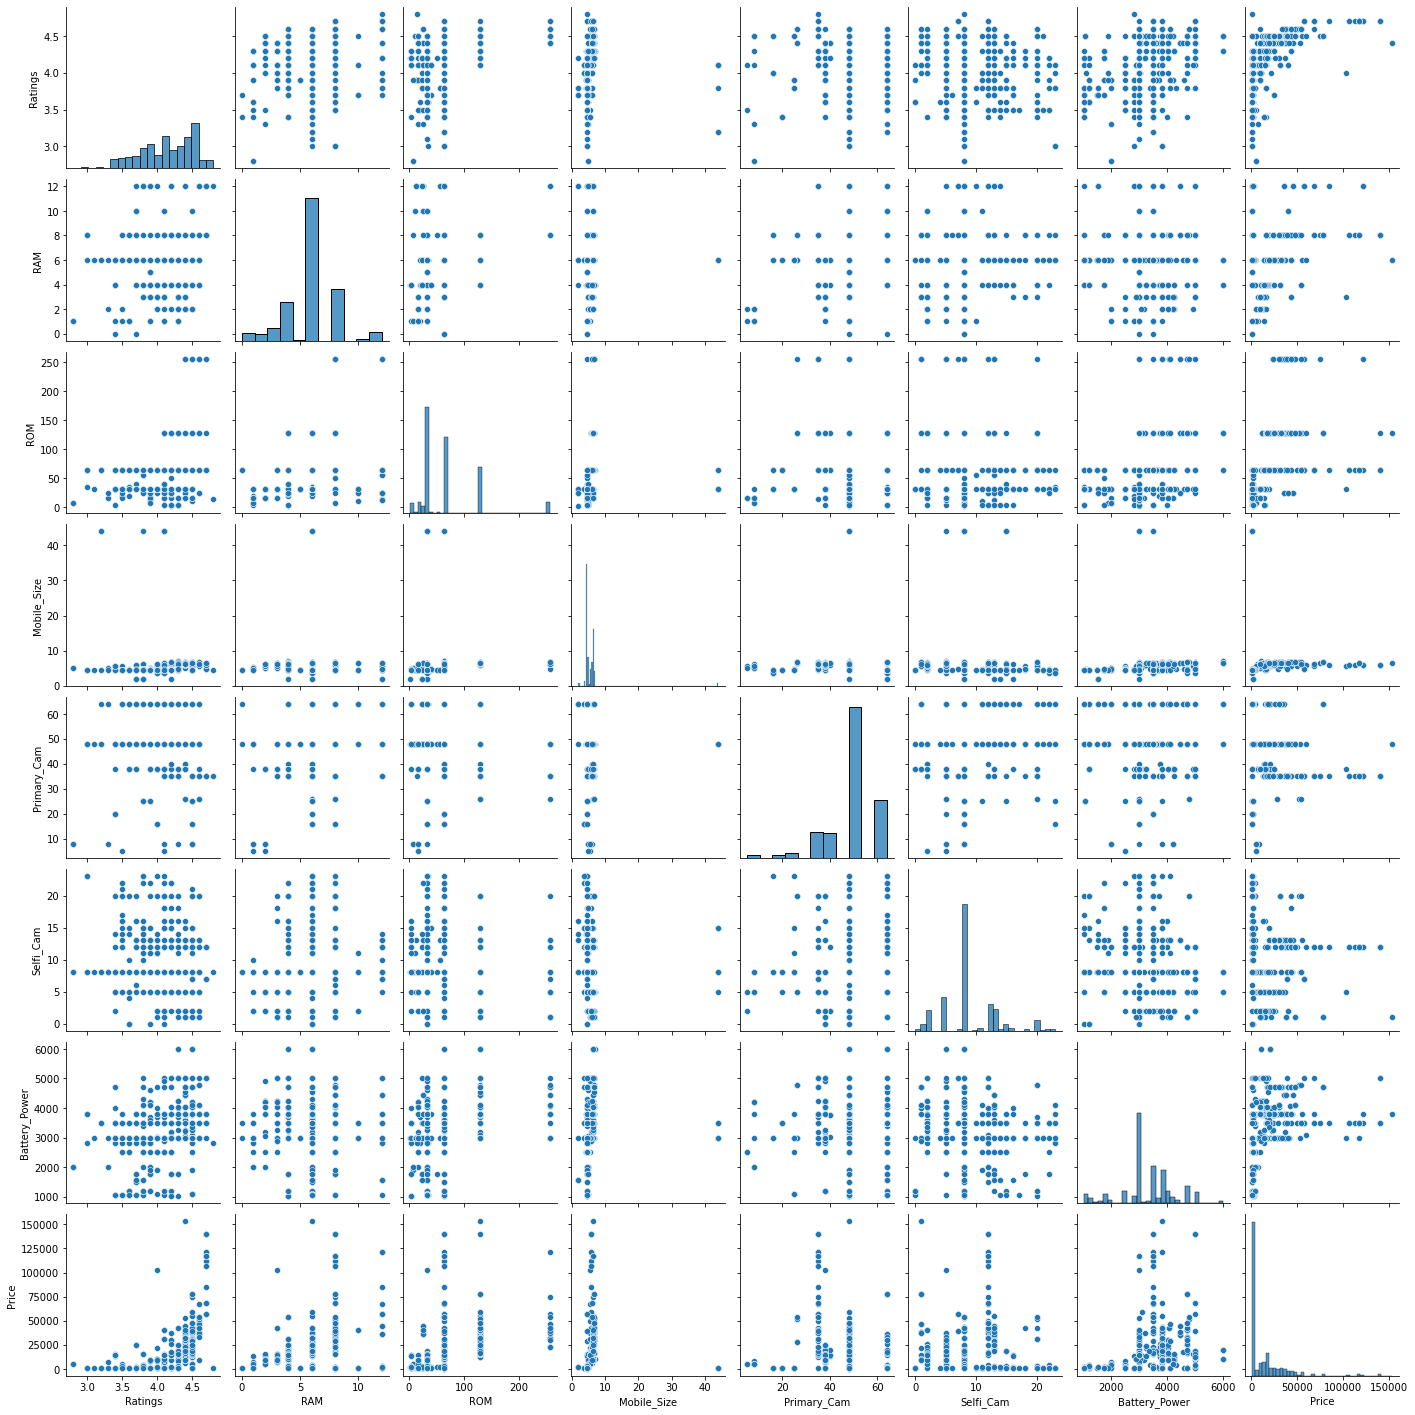

In [91]:
sns.pairplot(data = df)
plt.show()

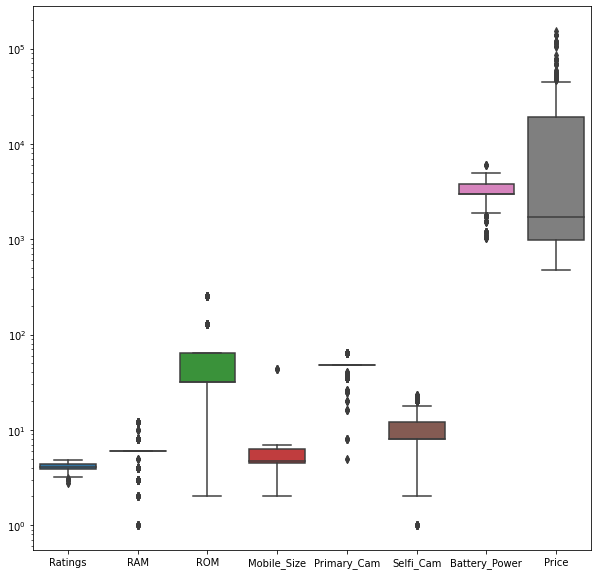

In [92]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df)
plt.yscale("log")

### Checking For Null values

In [93]:
df.isnull().values.any()

False

In [94]:
df.isnull().sum(axis=0)

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

### Removing Outliers
- Start using IQR
- Refine manually as IQR can be quite sensitive and remove a lot of data

In [95]:
def remove_outliers_iqr(df, target_columns):
    df_cleaned = df.copy()
    
    for column in target_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        df_cleaned = df_cleaned[~((df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR)))]
    
    return df_cleaned

In [96]:
cleaned_df = remove_outliers_iqr(df, target_columns=['Mobile_Size', 'ROM'])

In [97]:
cleaned_df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
10,3.9,6.0,32.0,4.54,64,8.0,4100,1099
11,3.8,6.0,32.0,4.50,64,8.0,1050,1299


In [105]:
# Removing Primary_Cam outliers
cleaned_df = cleaned_df[cleaned_df['Primary_Cam'] > 8]

In [109]:
# Removing Selfi_Cam outliers
cleaned_df = cleaned_df[cleaned_df['Selfi_Cam'] > 2]

In [112]:
# Removing Mobile_Size outliers
cleaned_df = cleaned_df[cleaned_df['Mobile_Size'] > 2]

In [118]:
# Removing Battery_Power outliers
cleaned_df = cleaned_df[cleaned_df['Battery_Power'] < 6000]

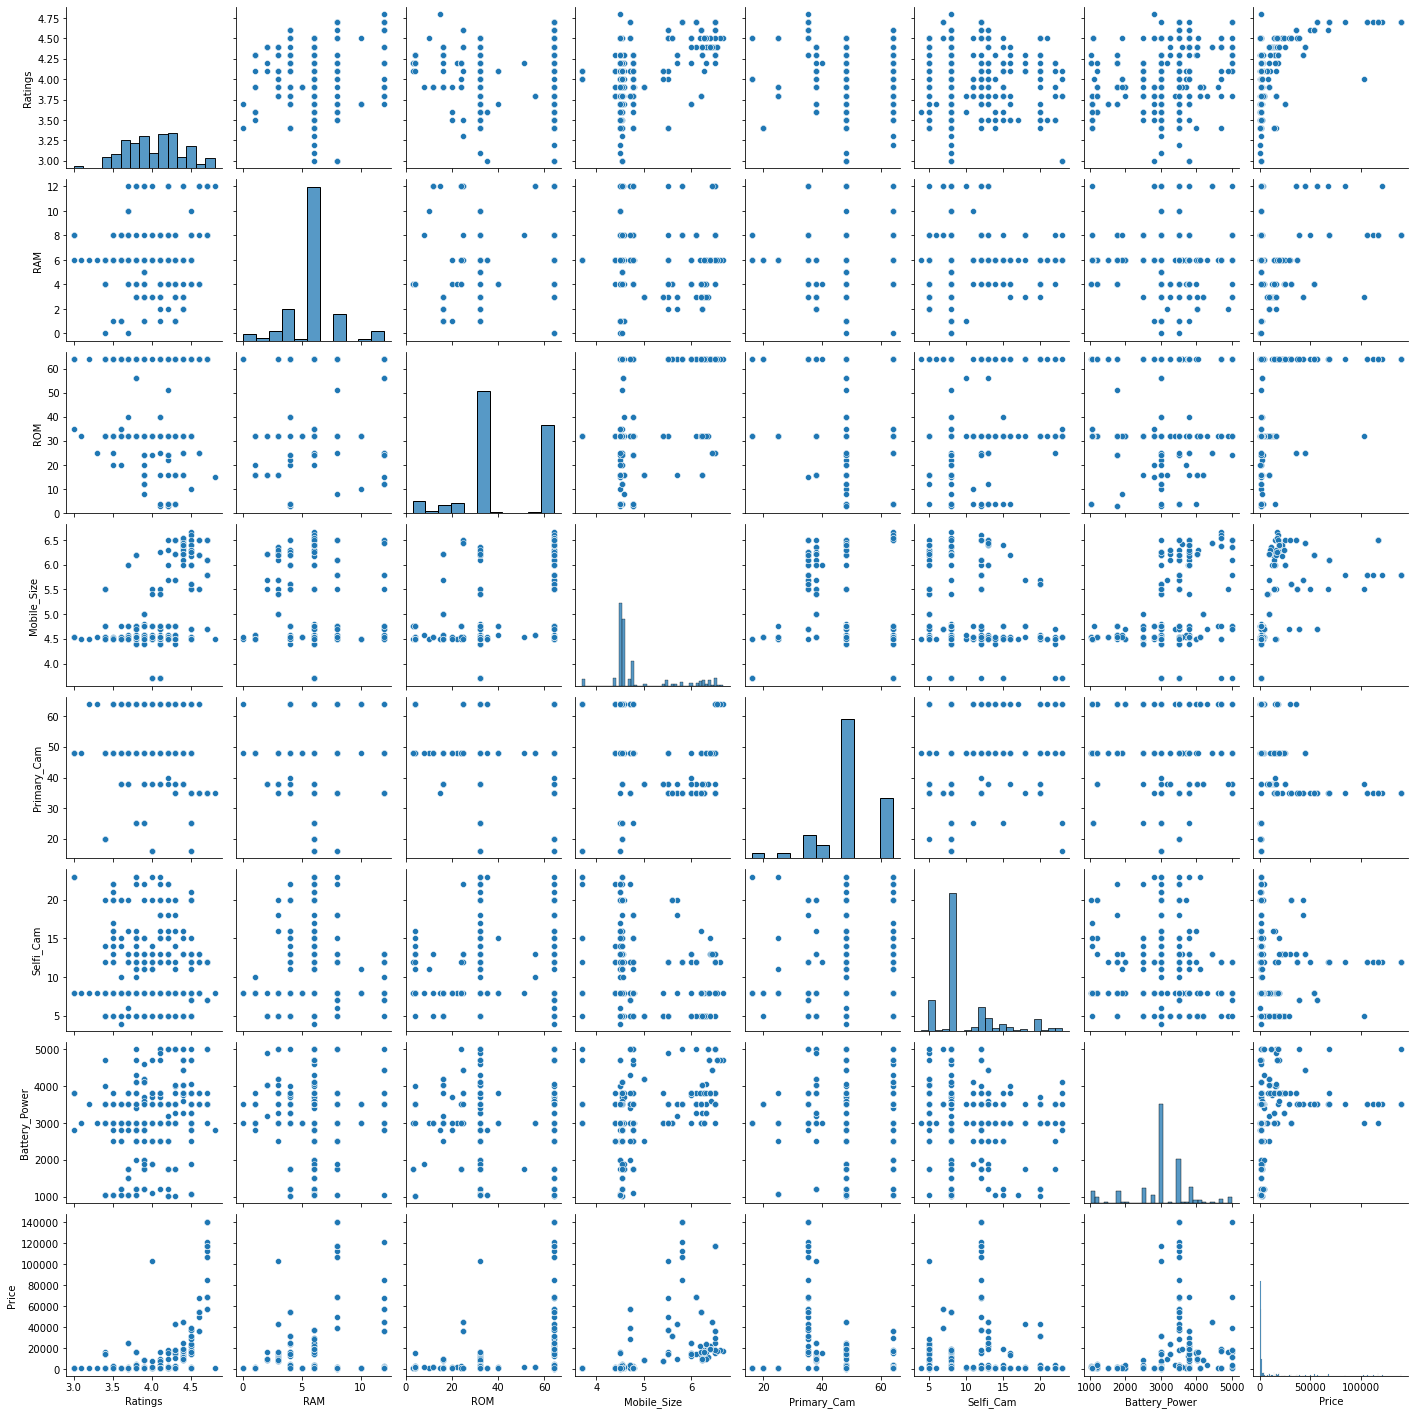

In [119]:
sns.pairplot(data = cleaned_df)
plt.show()

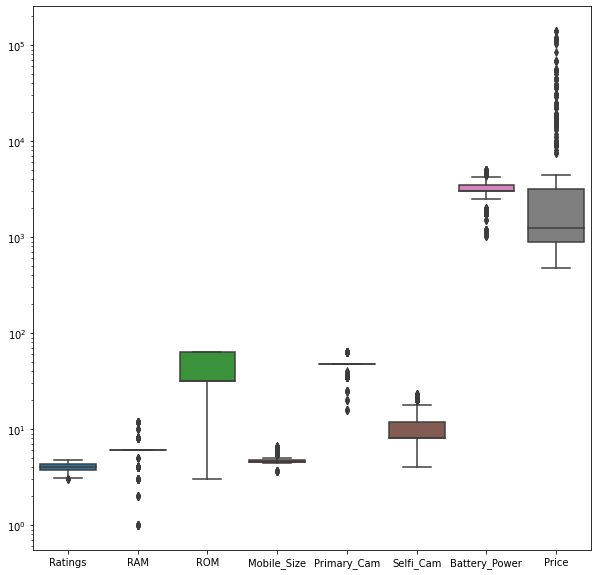

In [120]:
plt.figure(figsize = (10,10))
sns.boxplot(data = cleaned_df)
plt.yscale("log")

###  Creating new features from the data we have